In [3]:
import pandas as pd
import numpy as np
import os
from os.path import splitext, basename
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reads in the compiled dataset
dfm=pd.read_excel(r'../MeltInclusionCompilation_Sept22.xlsx')

In [5]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


In [6]:
Voyer=dfm.loc[dfm['reference']=="LeVoyer_2010"]
Voyer['Sat_P_Pref']=Voyer['satp_meash2omeasco2']/1000
Voyer['Study']="Voyer"
Voyer['Comp']="Basalt"



Ruscitto=dfm.loc[dfm['reference']=="Ruscitto_2011"]
Ruscitto['Sat_P_Pref']=Ruscitto['satp_meash2omeasco2']/1000
Ruscitto['Study']="Ruscitto"
Ruscitto['Comp']="Basalt"



MI_Combo=pd.concat([Voyer, Ruscitto], axis=0)

In [6]:
len(MI_Combo)

45

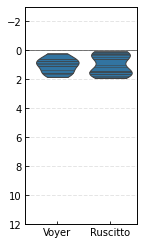

In [7]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["Voyer", "Ruscitto"]
sns.violinplot(x="Study", y="Sat_P_Pref",  cut=0, inner="stick", linewidth=1,
               hue='Comp',
            data=MI_Combo,  ax=ax1,  order=volc_order, stick=True)
##

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([-0.6, 1.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([ 0, 1])
#ax1.set_xticklabels(['Voyer', 'W2016', 'W2019', ''], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax1.get_legend().remove()   
ax2.set_yticks([])
fig.savefig('SHasta_MIs.png', dpi=200, bbox_inches="tight")